# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [1]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
mkdir data

In [6]:
cd data

/content/data


In [7]:
ls

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [8]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=46f2f7ada50b76dc035de316886449fdecfa57aab0cabc189e8720517421078d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

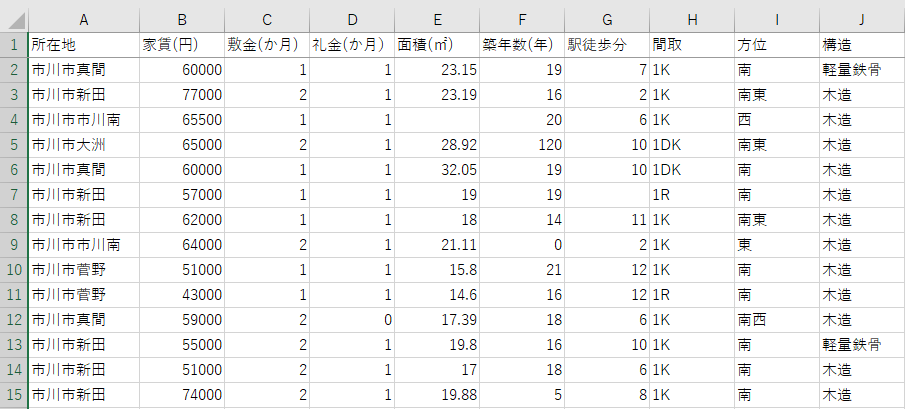

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [9]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [10]:
df = pd.read_csv('house_rent.csv',encoding='cp932')
df.head(2)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造


## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [11]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [12]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [13]:
df['所在地'].value_counts()

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64

In [ ]:
df['敷金(か月)'].value_counts()

2    166
1    129
0      9
Name: 敷金(か月), dtype: int64

In [ ]:
df['礼金(か月）'].value_counts()

1.0    246
2.0     29
0.0     28
0.5      1
Name: 礼金(か月）, dtype: int64

In [ ]:
df['間取'].value_counts()

1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

In [ ]:
df['方位'].value_counts()

南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64

In [ ]:
df['構造'].value_counts()

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [14]:
address = pd.get_dummies(df['所在地'],drop_first=True)
securitydeposit = pd.get_dummies(df['敷金(か月)'],drop_first=True)
keymoney = pd.get_dummies(df['礼金(か月）'],drop_first=True)
floorplan = pd.get_dummies(df['間取'],drop_first=True)
direction = pd.get_dummies(df['方位'],drop_first=True)
structure = pd.get_dummies(df['構造'],drop_first=True)

df2 = pd.concat([df,address],axis=1)
df3 = pd.concat([df2,securitydeposit],axis=1)
df4 = pd.concat([df3,keymoney],axis=1)
df5 = pd.concat([df4,floorplan],axis=1)
df6 = pd.concat([df5,direction],axis=1)
df7 = pd.concat([df6,structure],axis=1)

df7 = df7.drop(['所在地'],axis=1)
df7 = df7.drop(['敷金(か月)'],axis=1)
df7 = df7.drop(['礼金(か月）'],axis=1)
df7 = df7.drop(['間取'],axis=1)
df7 = df7.drop(['方位'],axis=1)
df7 = df7.drop(['構造'],axis=1)

df7.head(5)

,家賃(円),面積(㎡),築年数(年),駅徒歩分,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1,2,0.5,1.0,2.0,1K,1R,北東,南,南東,南西,東,西,軽量鉄骨,鉄骨造
0,60000,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,77000,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
2,65500,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,65000,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,60000,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [15]:
train_val, test = train_test_split(df7, test_size = 0.2, random_state = 0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [16]:
train_val.isnull().sum()

家賃(円)     0
面積(㎡)     1
築年数(年)    1
駅徒歩分      1
市川市大洲     0
市川市大町     0
市川市市川     0
市川市市川南    0
市川市平田     0
市川市新田     0
市川市真間     0
市川市菅野     0
市川市須和田    0
1         0
2         0
0.5       0
1.0       0
2.0       0
1K        0
1R        0
北東        0
南         0
南東        0
南西        0
東         0
西         0
軽量鉄骨      0
鉄骨造       0
dtype: int64

In [17]:
train_val_mean = train_val.mean()
train_val2=train_val.fillna(train_val_mean)
train_val2.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,家賃(円),面積(㎡),築年数(年),駅徒歩分,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1,2,0.5,1.0,2.0,1K,1R,北東,南,南東,南西,東,西,軽量鉄骨,鉄骨造
176,69000,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
26,70000,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
74,65000,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
101,51000,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0
154,72000,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20870 missing from current font.
  font.set_text

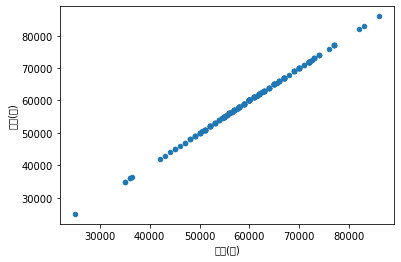

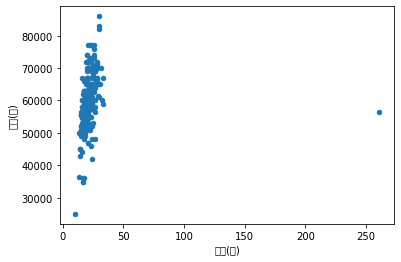

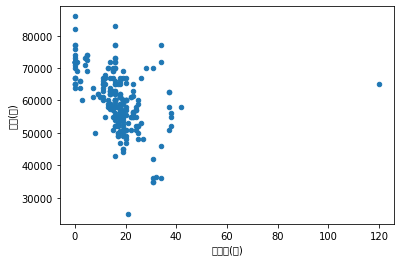

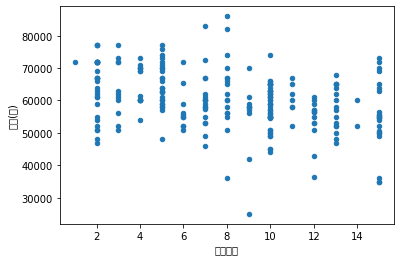

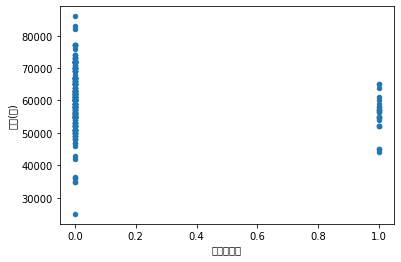

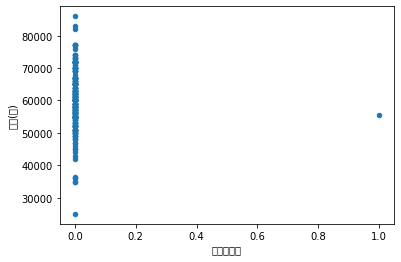

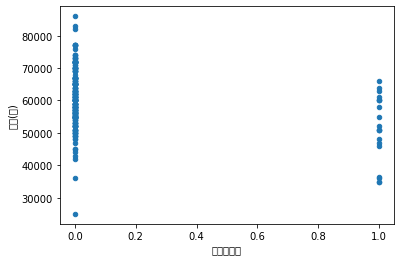

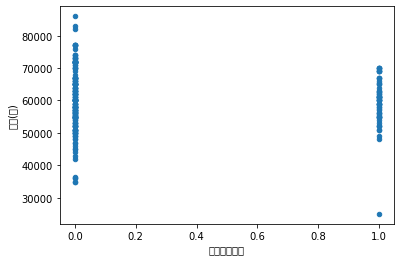

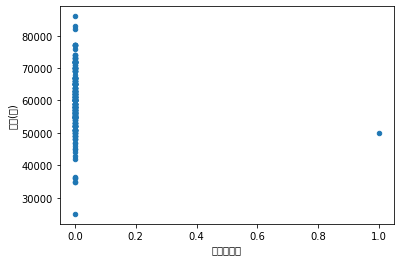

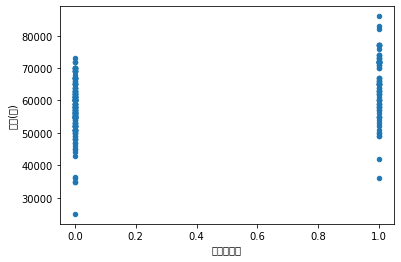

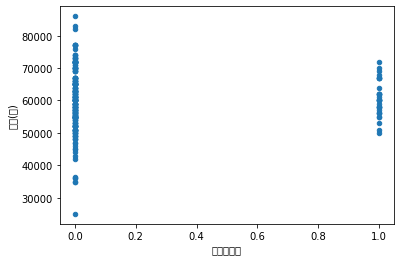

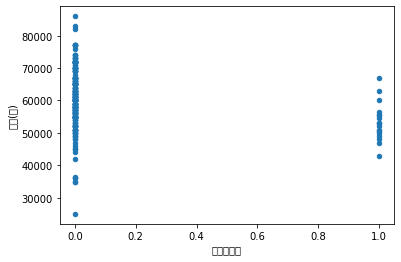

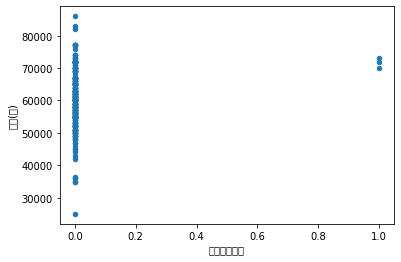

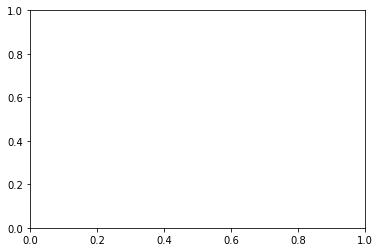

In [18]:
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = '家賃(円)')

## 問題９　外れ値処理の結果を表示してください。

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text

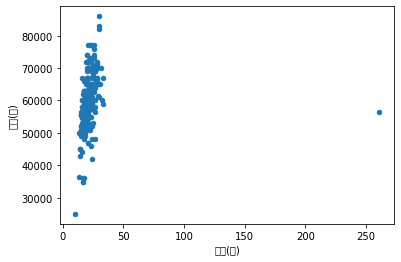

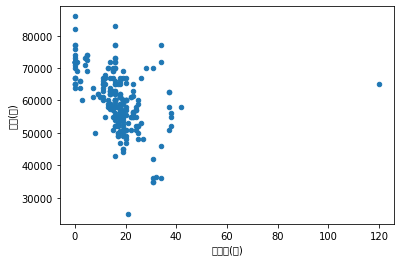

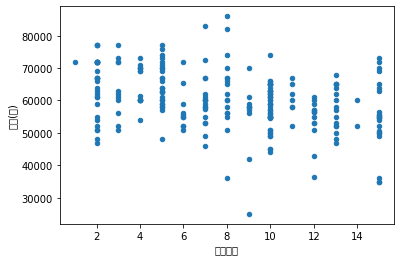

In [19]:
train_val2.plot(kind = 'scatter', x = '面積(㎡)', y = '家賃(円)')
train_val2.plot(kind = 'scatter', x = '築年数(年)', y = '家賃(円)')
train_val2.plot(kind = 'scatter', x = '駅徒歩分', y = '家賃(円)')

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [20]:
df = pd.read_csv('house_rent.csv',encoding='cp932')
df1 = df.drop('所在地',axis=1)
df2 = df1.drop('敷金(か月)',axis=1)
df3 = df2.drop('礼金(か月）',axis=1)
df4 = df3.drop('間取',axis=1)
df5 = df4.drop('方位',axis=1)
df6 = df5.drop('構造',axis=1)
df6.head(5)

,家賃(円),面積(㎡),築年数(年),駅徒歩分
0,60000,23.15,19.0,7.0
1,77000,23.19,16.0,2.0
2,65500,NaN,20.0,6.0
3,65000,28.92,120.0,10.0
4,60000,32.05,19.0,10.0


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [21]:
#欠損値の穴埋め
train_val3 = train_val2.fillna(0)

col =['面積(㎡)', '築年数(年)', '駅徒歩分']
x = train_val3[col]
t = train_val3[['家賃(円)']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [22]:
from sklearn.preprocessing import StandardScaler

def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

x = train_val3.loc[ :, ['面積(㎡)', '築年数(年)', '駅徒歩分']]
t = train_val3[['家賃(円)']]
s1,s2 = learn(x, t)
print(s1, s2)

0.44205314715021116 -8.337868500349963


## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [27]:
#欠損値の穴埋め
train_val3 = train_val2.fillna(0)

col =['面積(㎡)', '築年数(年)', '駅徒歩分']
x = train_val3[col]
t = train_val3[['家賃(円)']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

x = train_val3.loc[ :, ['面積(㎡)', '築年数(年)', '駅徒歩分']]
t = train_val3[['家賃(円)']]

x_train, x_val, y_train, y_val = train_test_split(x, t,
test_size = 0.2, random_state = 0)
# 訓練データを標準化
sc_model_x = StandardScaler()
sc_model_y = StandardScaler()
sc_model_x.fit(x_train)
sc_x_train = sc_model_x.transform(x_train)
sc_model_y.fit(y_train)
sc_y_train = sc_model_y.transform(y_train)
# 学習
model = LinearRegression()
model.fit(sc_x_train, sc_y_train)
#検証データを標準化
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 訓練データと検証データの決定係数計算
train_score = model.score(sc_x_train, sc_y_train)
val_score = model.score(sc_x_val, sc_y_val)

col =['30', '3', '10']
model.predict(col)


ValueError: ignored

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。